In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [152]:
data = pd.read_csv("customer_support_tickets.csv")

In [153]:
data.head(4)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0


In [148]:
data.isnull().sum()

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [149]:
data.shape

(8469, 17)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   int32         
 2   Customer Email                8469 non-null   int32         
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   int32         
 5   Product Purchased             8469 non-null   int32         
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   int32         
 8   Ticket Subject                8469 non-null   int32         
 9   Ticket Description            8469 non-null   int32         
 10  Ticket Status                 8469 non-null   int32         
 11  Resolution                    

In [154]:
data.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


# Data Cleaning

In [120]:
data["Date of Purchase"] = pd.to_datetime(data["Date of Purchase"])
data["First Response Time"] = pd.to_datetime(data["First Response Time"])
data["Time to Resolution"] = pd.to_datetime(data["Time to Resolution"])

In [121]:
data["Resolution"] = data["Resolution"].fillna(data["Resolution"].mode()[0])
data["Customer Satisfaction Rating"] = data["Customer Satisfaction Rating"].fillna(data["Customer Satisfaction Rating"].median())

In [122]:
data["First Response Time"] = data["First Response Time"].fillna(method="ffill").fillna(method="bfill")
data["Time to Resolution"] = data["Time to Resolution"].fillna(method="ffill").fillna(method="bfill")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\1267693210.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["First Response Time"] = data["First Response Time"].fillna(method="ffill").fillna(method="bfill")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\1267693210.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Time to Resolution"] = data["Time to Resolution"].fillna(method="ffill").fillna(method="bfill")


# EDA

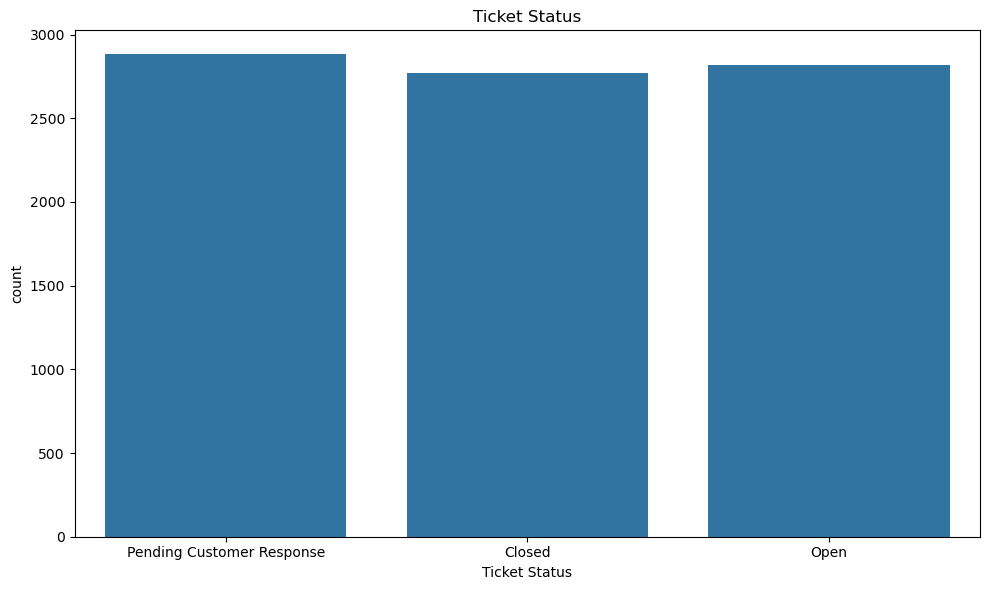

In [123]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Ticket Status", data = data)
plt.title("Ticket Status")
plt.tight_layout()
plt.show()

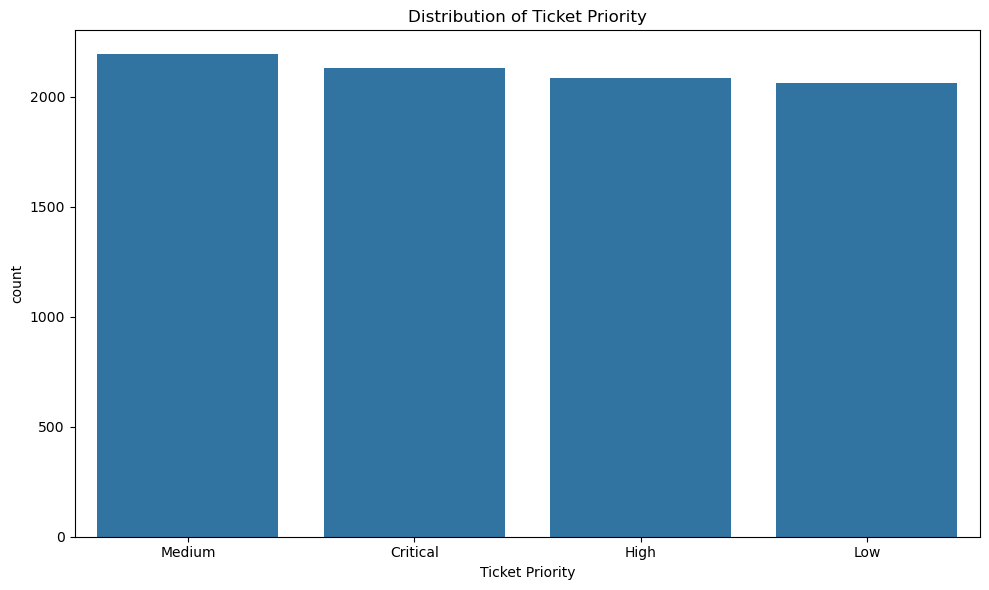

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Ticket Priority", data=data, order=data["Ticket Priority"].value_counts().index)
plt.title("Distribution of Ticket Priority")
plt.tight_layout()
plt.show()

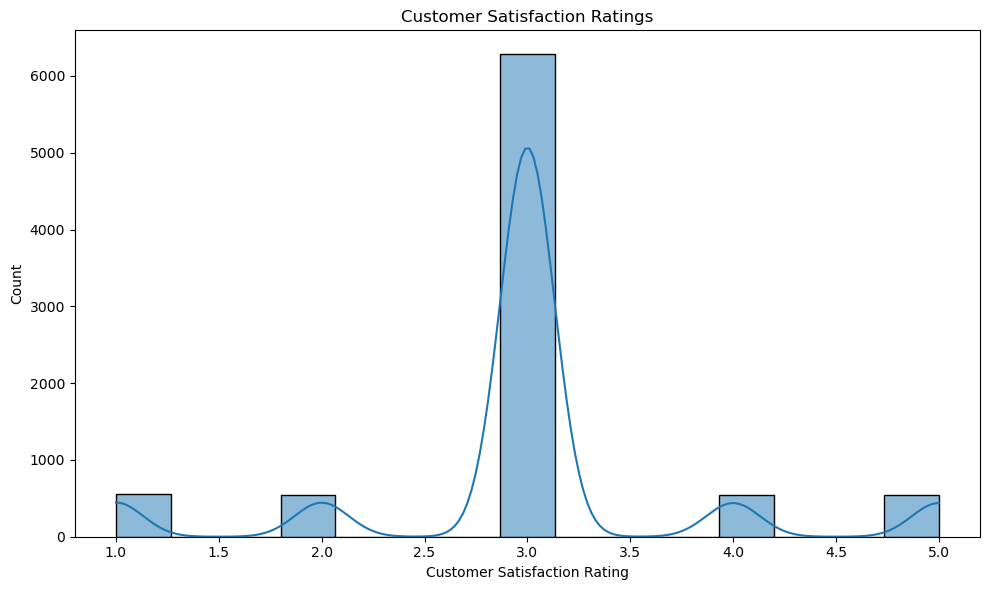

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Customer Satisfaction Rating"].dropna(), kde=True)
plt.title("Customer Satisfaction Ratings")
plt.tight_layout()
plt.show()

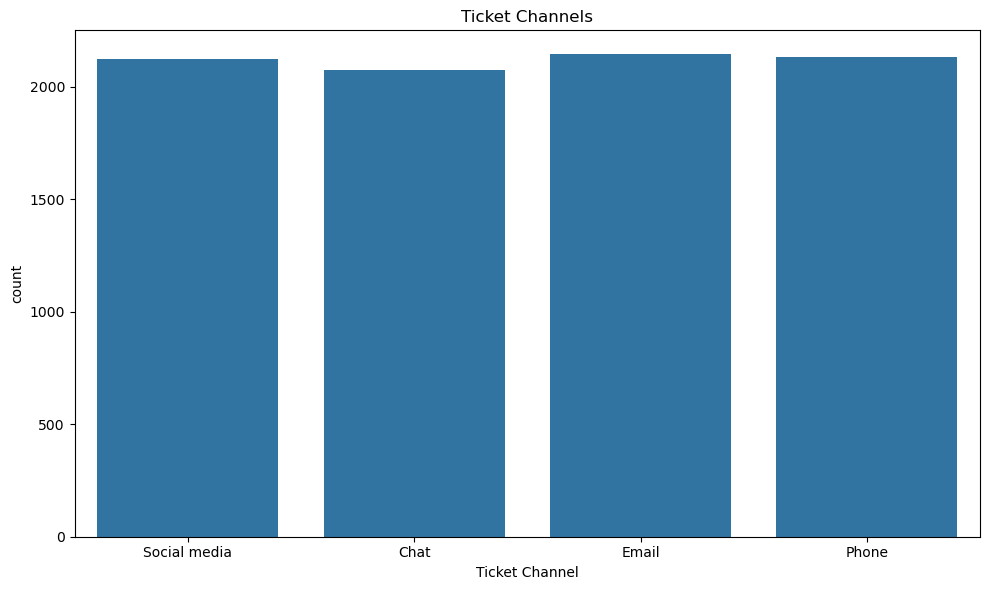

In [126]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Ticket Channel", data=data)
plt.title("Ticket Channels")
plt.tight_layout()
plt.show()

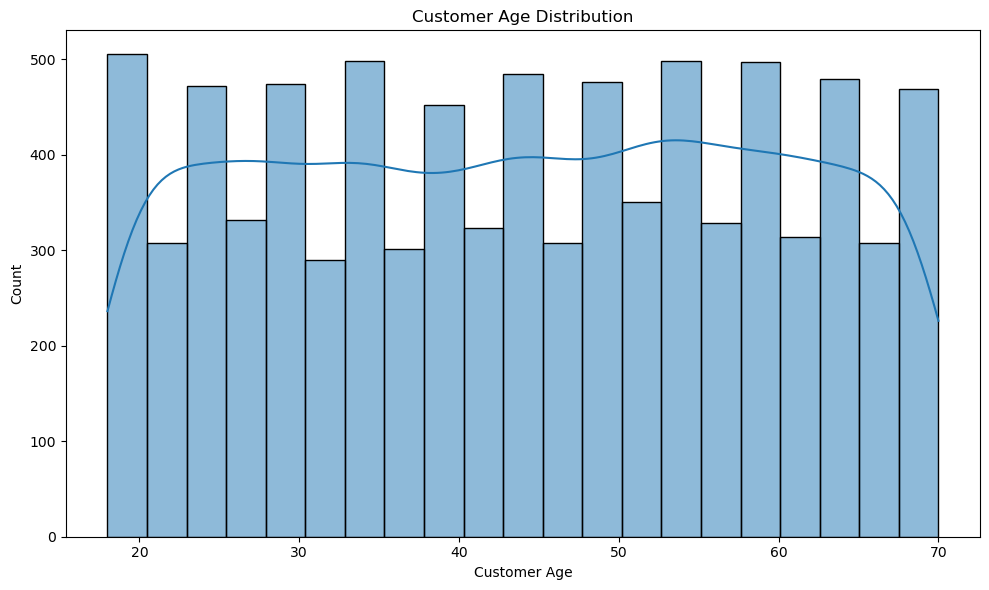

In [127]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Customer Age"], kde=True)
plt.title("Customer Age Distribution")
plt.tight_layout()
plt.show()

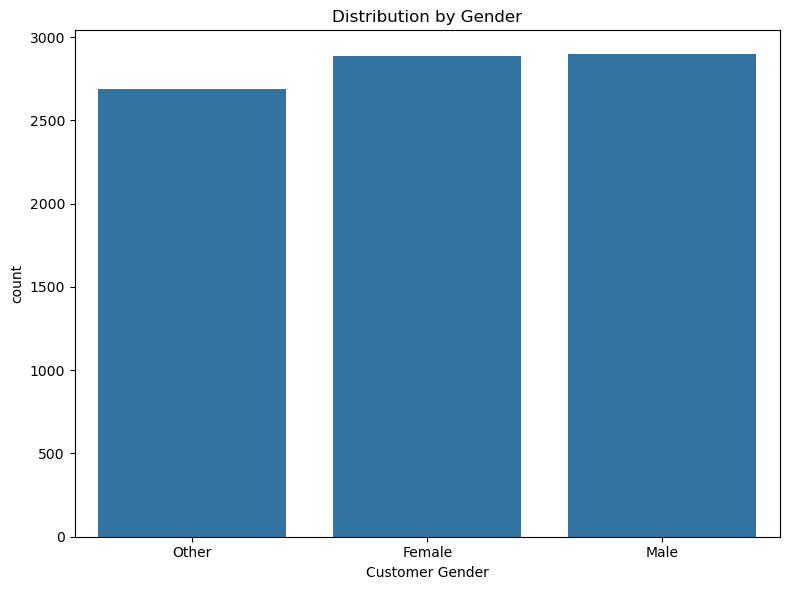

In [128]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Customer Gender", data=data)
plt.title("Distribution by Gender")
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\2817293482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Ticket Type", y="Customer Satisfaction Rating", data=data, palette="viridis")


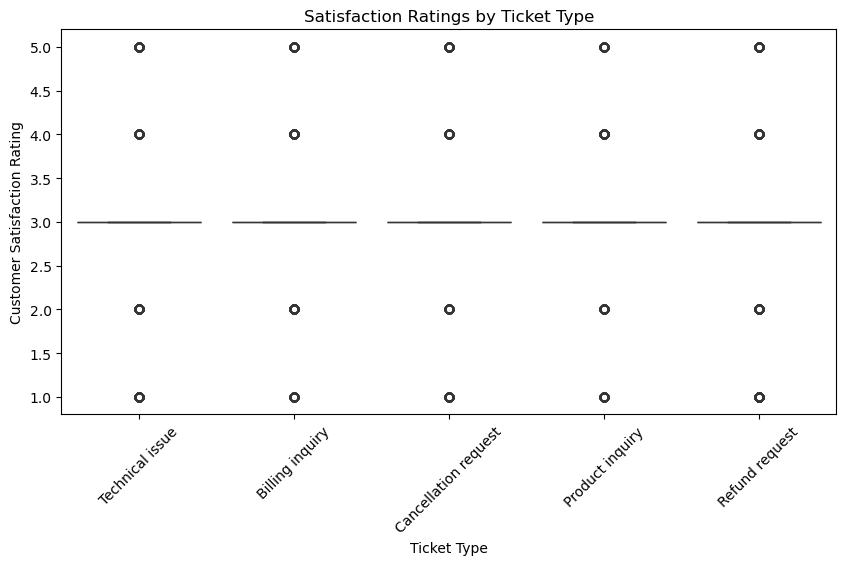

In [129]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Ticket Type", y="Customer Satisfaction Rating", data=data, palette="viridis")
plt.title("Satisfaction Ratings by Ticket Type")
plt.xticks(rotation=45)
plt.show()

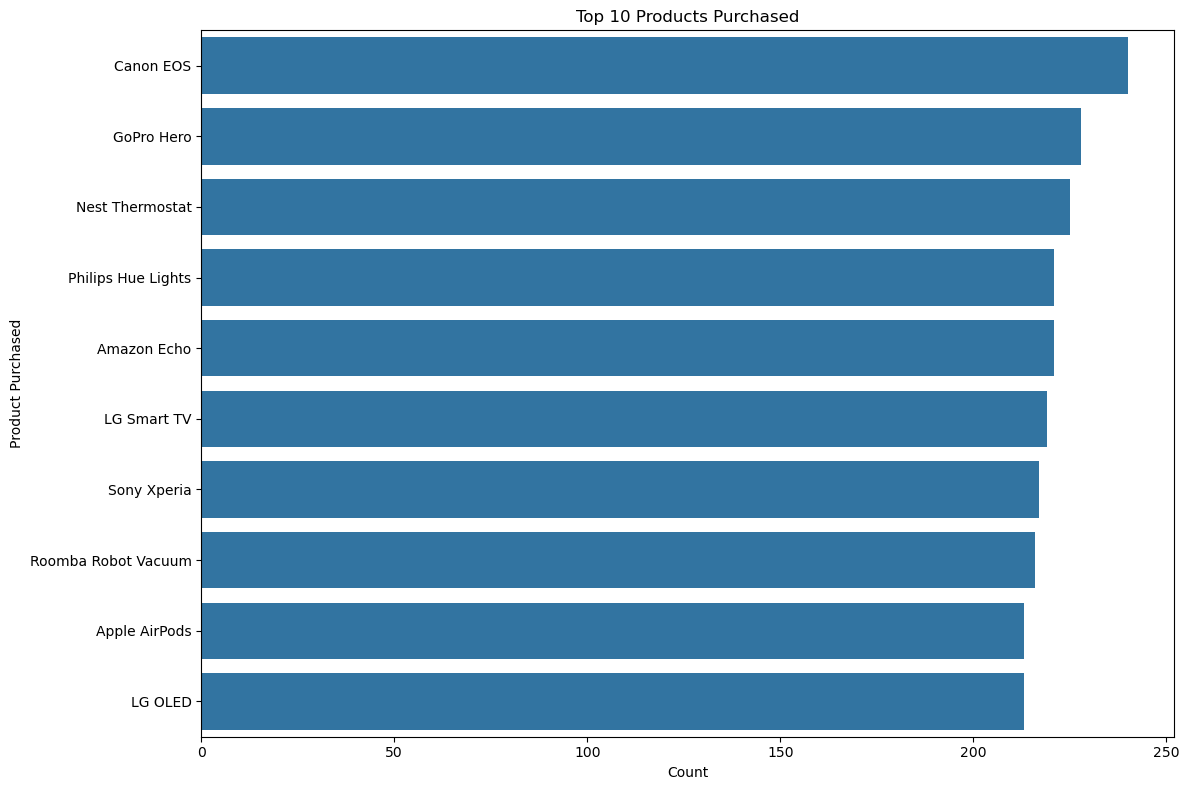

In [130]:
plt.figure(figsize=(12, 8))
product_counts = data["Product Purchased"].value_counts().head(10)
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title("Top 10 Products Purchased")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


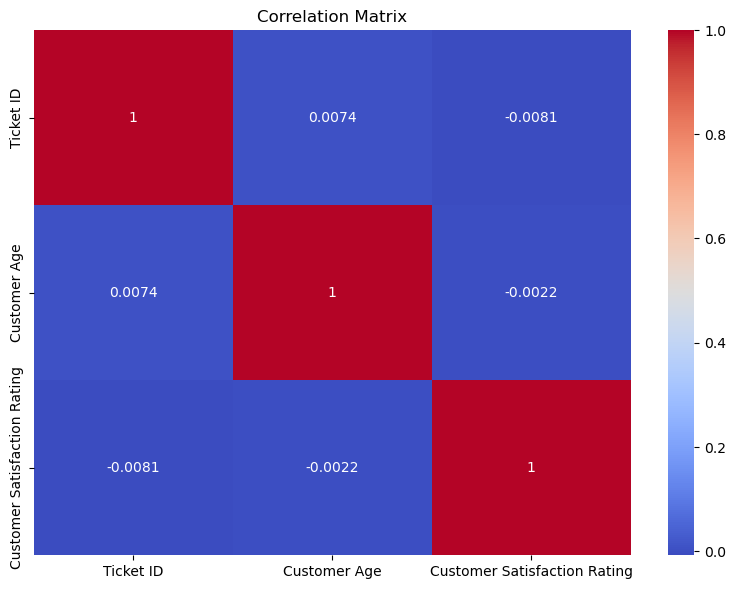

In [131]:
numeric_data = data.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\832297537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subjects.values, y=top_subjects.index, palette="mako")


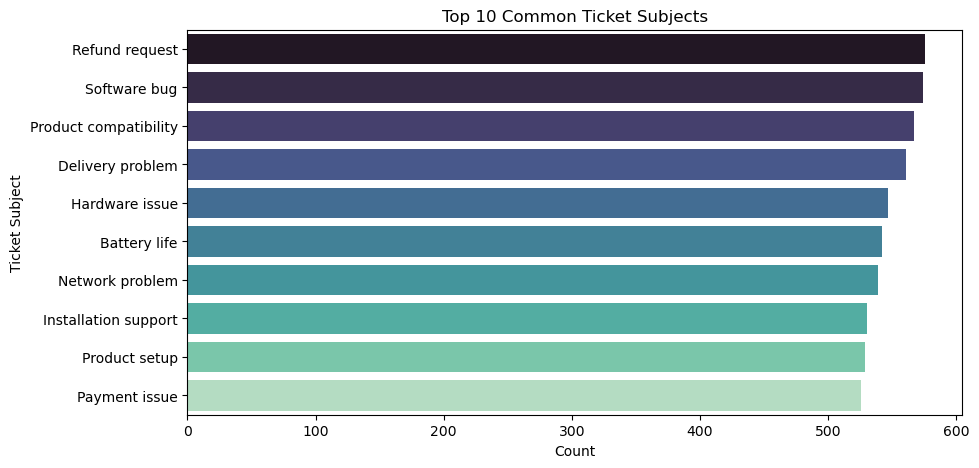

In [132]:
plt.figure(figsize=(10, 5))
top_subjects = data["Ticket Subject"].value_counts().head(10)
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette="mako")
plt.title("Top 10 Common Ticket Subjects")
plt.xlabel("Count")
plt.ylabel("Ticket Subject")
plt.show()

Encoding Categorical Variables

In [133]:
label_encoders = {}
for col in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Splitting data

In [140]:
x = data.drop(["Customer Satisfaction Rating", "Ticket ID","Date of Purchase","First Response Time","Time to Resolution"], axis=1, errors="ignore")
y = data["Customer Satisfaction Rating"]

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [142]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

Model Training

In [143]:
dt = DecisionTreeClassifier(random_state=42, max_depth=10, criterion="gini", class_weight="balanced")
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [144]:
# Using CV for better accuracy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt, x_train, y_train, cv=cv, scoring="accuracy")
print(f" Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

 Cross-Validation Accuracy: 0.7382 ± 0.0051


In [145]:
y_pred = dt.predict(X_test)

# Model Evaluation

In [146]:
y_pred = dt.predict(X_test)
print("\nModel Evaluation on Test Data:")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Evaluation on Test Data:
Test Accuracy: 0.7409

Classification Report:
               precision    recall  f1-score   support

         1.0       0.18      0.16      0.17       111
         2.0       0.24      0.52      0.32       110
         3.0       0.99      0.91      0.95      1256
         4.0       0.19      0.19      0.19       108
         5.0       0.19      0.16      0.17       109

    accuracy                           0.74      1694
   macro avg       0.36      0.39      0.36      1694
weighted avg       0.79      0.74      0.76      1694


Confusion Matrix:
 [[  18   43    3   26   21]
 [  16   57    2   20   15]
 [  26   44 1142   25   19]
 [  16   48    5   21   18]
 [  22   49    2   19   17]]
